In [2]:
import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# 加载数据
data = pd.read_excel('UCLOOK0509origin.xls')
X = data.iloc[:, 0:27]
y = data.iloc[:, 27]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# 训练随机森林分类器
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train, y_train)

explainer = shap.Explainer(rf_model, X_train, feature_names=X_train.columns)
shap_values = explainer.shap_values(X_train, check_additivity=False)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# 计算特征重要性
#explainer = shap.TreeExplainer(rf_model)
#shap_values = explainer.shap_values(X_train)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

100%|===================| 38761/38766 [42:12<00:00]        

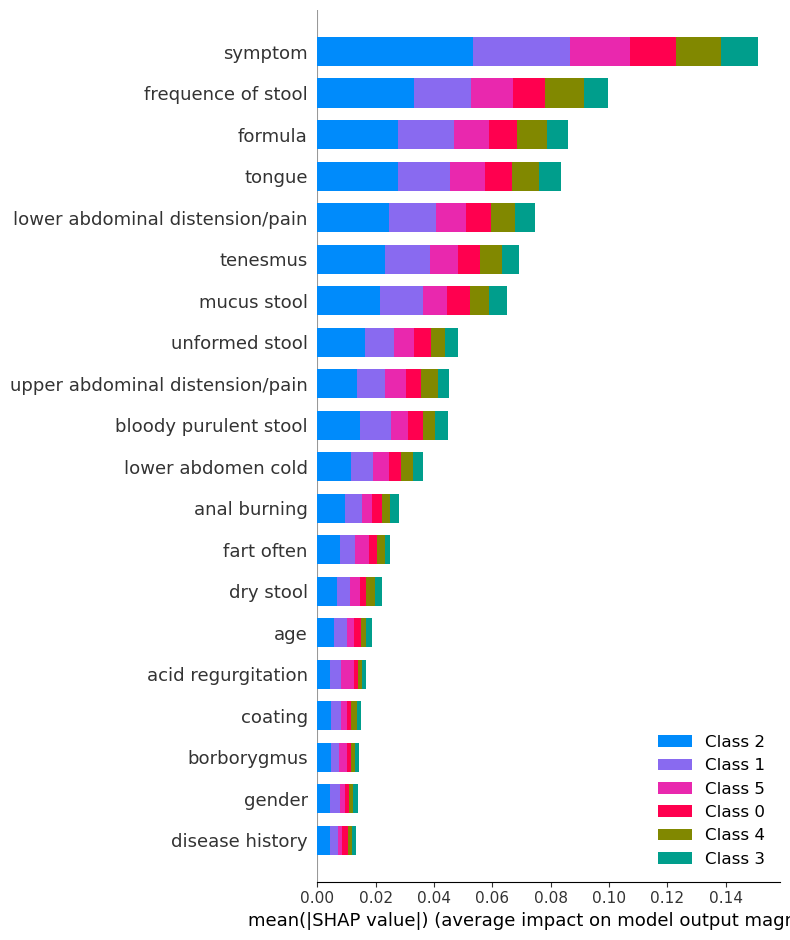

In [4]:
# 训练随机森林分类器
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train, y_train)

explainer = shap.Explainer(rf_model, X_train, feature_names=X_train.columns)
shap_values = explainer.shap_values(X_train, check_additivity=False)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# 计算特征重要性
#explainer = shap.TreeExplainer(rf_model)
#shap_values = explainer.shap_values(X_train)

In [4]:
# Plot a violin plot of the SHAP values for feature 0
shap_values_feature_0 = shap_values(X_train)
shap.summary_plot(shap_values_feature_0, data.data[:27,:], plot_type="violin")

TypeError: 'list' object is not callable

In [ ]:
#画出表头特征的图
explainer = shap.Explainer(rf_model, X_train, feature_names=X_train.columns)
shap_values = explainer.shap_values(X_train, check_additivity=False)
shap.summary_plot(shap_values, X_train, plot_type="bar")

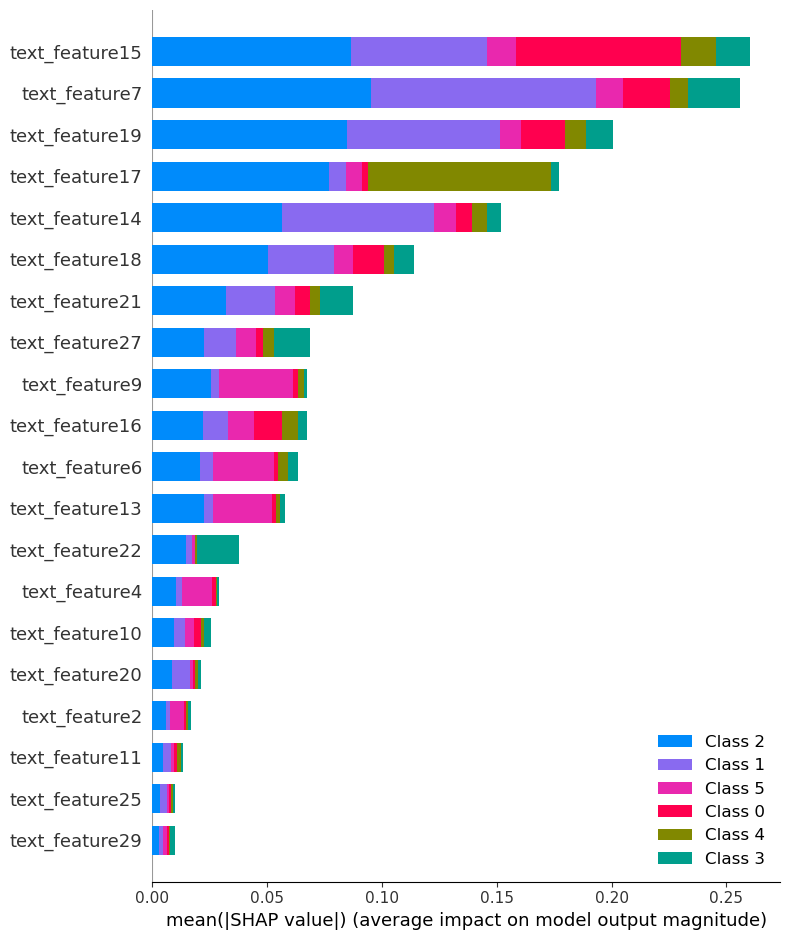

In [4]:
# 可视化特征重要性
#shap.summary_plot(shap_values, X_train, plot_type="bar")

In [8]:
# Plot a violin plot of the SHAP values for feature 0
shap_values_feature_0 = shap_values(X_train)
shap.summary_plot(shap_values_feature_0, data.data[:27,:], plot_type="violin")

TypeError: 'list' object is not callable

In [5]:
import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# load the data from the Excel file
data = pd.read_excel('D:\\temp\\gaogong\\UCLOOK0509origin.xls', header=None)

# extract the features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a random forest classifier on the training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# calculate SHAP values for the test set
explainer = shap.Explainer(rf)
shap_values = explainer(X_test)

# get the feature names
feature_names = data.columns[:-1]

# plot a violin plot of the SHAP values for feature 0
shap.summary_plot(shap_values[:, :, 0], X_test, feature_names=feature_names, plot_type="violin")

ValueError: could not convert string to float: 'acid regurgitation'

In [7]:
import pandas as pd
import lime
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 加载数据
data = pd.read_excel('UCLOOK0509origin.xls')
X = data.iloc[:, 0:27]
y = data.iloc[:, 27]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 训练随机森林分类器
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train, y_train)

# 初始化LIME解释器
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=y.unique(), discretize_continuous=False)

# 选择要解释的样本的索引
sample_index = 137
sample = X_test.iloc[[sample_index]]
sample_label = y_test.iloc[sample_index]

# 生成解释
explanation = explainer.explain_instance(sample.values[0], rf_model.predict_proba)

# 打印解释结果
print("样本的真实标签:", sample_label)
print("样本的最终预测标签:", rf_model.predict(sample)[0])
print("解释:")
explanation.show_in_notebook(show_table=True)

样本的真实标签: 4
样本的最终预测标签: 4
解释:


C:\Users\jjzhu\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


C:\Users\jjzhu\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


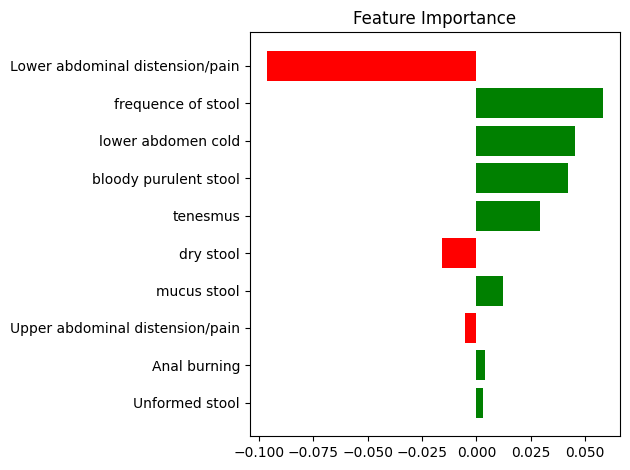

In [86]:
import pandas as pd
import lime
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_excel('UCLOOK0509origin.xls')
X = data.iloc[:, 0:27]
y = data.iloc[:, 27]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 训练随机森林分类器
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train, y_train)

# 初始化LIME解释器
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns.tolist(), class_names=['0', '1', '2', '3', '4', '5'], discretize_continuous=False)

# 包装器函数获取模型的预测概率
def predict_proba_wrapper(samples):
    return rf_model.predict_proba(samples)

# 选择要解释的样本的索引
sample_index = 66
sample = X_test.iloc[[sample_index]]
sample_label = y_test.iloc[sample_index]

# Generate explanations using LIME
explanation = explainer.explain_instance(sample.values[0], rf_model.predict_proba)

# Print feature importance plot
explanation.as_pyplot_figure()
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# 生成解释
#explanation = explainer.explain_instance(sample.values[0], predict_proba_wrapper)

# 打印解释结果
#print("样本的真实标签:", sample_label)
#print("样本的最终预测标签:", rf_model.predict(sample)[0])
#print("解释:")
#explanation.show_in_notebook(show_table=True)

# Print feature importance plot
# explanation.as_pyplot_figure()
# plt.title("Feature Importance")
# plt.tight_layout()
# plt.show()

In [3]:
# Find samples with predicted class 5
predicted_class_4_indices = [i for i in range(len(y_test)) if y_test.iloc[i] == 4]

# Print the indices
print("预测结果为4的样本索引:")
print(predicted_class_4_indices)

预测结果为4的样本索引:
[28, 66, 67, 70, 78, 137, 146, 183, 228, 268, 269, 278, 295, 338, 340, 346, 395, 401, 418, 423, 437, 446, 504, 505, 512, 515, 578, 579, 645, 684, 688, 702, 713, 723, 729, 730, 741, 743, 754, 757, 761, 775, 782, 801, 820, 822, 839, 855, 859, 874, 919, 930, 991, 994, 995, 1004, 1015, 1020, 1081, 1086, 1101, 1115, 1134, 1160, 1222, 1227, 1241, 1246, 1310, 1336, 1374, 1391, 1398, 1401, 1411, 1427, 1445, 1456, 1461, 1466, 1485, 1511, 1519, 1537, 1544, 1577, 1599, 1608]


In [87]:
# Find samples with correct predictions
correct_prediction_indices = [i for i in range(len(y_test)) if y_test.iloc[i] == 0 if rf_model.predict(X_test.iloc[[i]]) == y_test.iloc[i]]

# Print the indices
print("预测结果正确的样本索引:")
print(correct_prediction_indices)

预测结果正确的样本索引:
[24, 31, 94, 107, 139, 142, 156, 189, 216, 230, 242, 341, 363, 365, 381, 384, 389, 415, 430, 442, 445, 487, 497, 514, 617, 620, 667, 668, 673, 706, 769, 792, 813, 819, 826, 844, 862, 895, 904, 965, 981, 1028, 1099, 1102, 1161, 1175, 1261, 1290, 1323, 1331, 1333, 1339, 1365, 1403, 1406, 1416, 1447, 1451, 1482, 1500, 1507, 1583, 1610]
